In [87]:
import pandas as pd
import numpy as np



In [88]:
# load data
data = pd.read_csv('hand_crafted_v3.csv')

In [89]:
data.head()

,item_id,prompt_id,mean_word,word_var,mean_sent,sent_var,ess_char_len,word_count,prep_comma,unique_word,...,WDT,DT,CD,NN,TO,JJ,VBP,RP,NNS,score
0,1,1,4.400593,5.842492,21.062500,171.308594,1483,337,71,117,...,0.000000,0.051546,0.000000,0.144330,0.025773,0.048969,0.030928,0.007732,0.043814,8.0
1,2,1,4.353222,5.469506,20.950000,142.247500,1824,419,70,125,...,0.002146,0.075107,0.008584,0.122318,0.017167,0.042918,0.036481,0.004292,0.087983,9.0
2,3,1,4.405018,5.545638,19.928571,184.637755,1229,279,41,113,...,0.000000,0.085714,0.006349,0.123810,0.025397,0.047619,0.076190,0.009524,0.111111,7.0
3,4,1,4.868321,6.415867,19.407407,135.722908,2551,524,77,179,...,0.003247,0.069805,0.000000,0.126623,0.024351,0.066558,0.040584,0.001623,0.086039,10.0
4,5,1,4.408602,5.450249,15.500000,43.516667,2050,465,56,128,...,0.005780,0.104046,0.009634,0.131021,0.040462,0.042389,0.036609,0.001927,0.078998,8.0


In [90]:
data.columns

Index(['item_id', 'prompt_id', 'mean_word', 'word_var', 'mean_sent',
       'sent_var', 'ess_char_len', 'word_count', 'prep_comma', 'unique_word',
       'clause_per_s', 'mean_clause_l', 'max_clause_in_s', 'spelling_err',
       'sent_ave_depth', 'ave_leaf_depth', 'automated_readability',
       'linsear_write', 'stop_prop', 'positive_sentence_prop',
       'negative_sentence_prop', 'neutral_sentence_prop',
       'overall_positivity_score', 'overall_negativity_score', ',', '.', 'VB',
       'JJR', 'WP', 'PRP$', 'VBN', 'VBG', 'IN', 'CC', 'JJS', 'PRP', 'MD',
       'WRB', 'RB', 'VBD', 'RBR', 'VBZ', 'NNP', 'POS', 'WDT', 'DT', 'CD', 'NN',
       'TO', 'JJ', 'VBP', 'RP', 'NNS', 'score'],
      dtype='object')

In [91]:
len(data.columns)

54

In [92]:
data.isna().sum()

item_id                     0
prompt_id                   0
mean_word                   0
word_var                    0
mean_sent                   0
sent_var                    0
ess_char_len                0
word_count                  0
prep_comma                  0
unique_word                 0
clause_per_s                0
mean_clause_l               0
max_clause_in_s             0
spelling_err                0
sent_ave_depth              0
ave_leaf_depth              0
automated_readability       0
linsear_write               0
stop_prop                   0
positive_sentence_prop      0
negative_sentence_prop      0
neutral_sentence_prop       0
overall_positivity_score    0
overall_negativity_score    0
,                           0
.                           0
VB                          0
JJR                         0
WP                          0
PRP$                        0
VBN                         0
VBG                         0
IN                          0
CC        

In [93]:
from sklearn.model_selection import train_test_split

X = data.drop(['score', 'item_id', 'prompt_id'], axis=1)
y = data[['score', 'item_id', 'prompt_id']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# shape
X_train.shape, X_test.shape


((10382, 51), (2596, 51))

In [95]:
# shape 
y_train.shape, y_test.shape

((10382, 3), (2596, 3))

In [96]:
# Visualize principal components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pca.fit(X_train)
# Transform the data to the new feature space
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

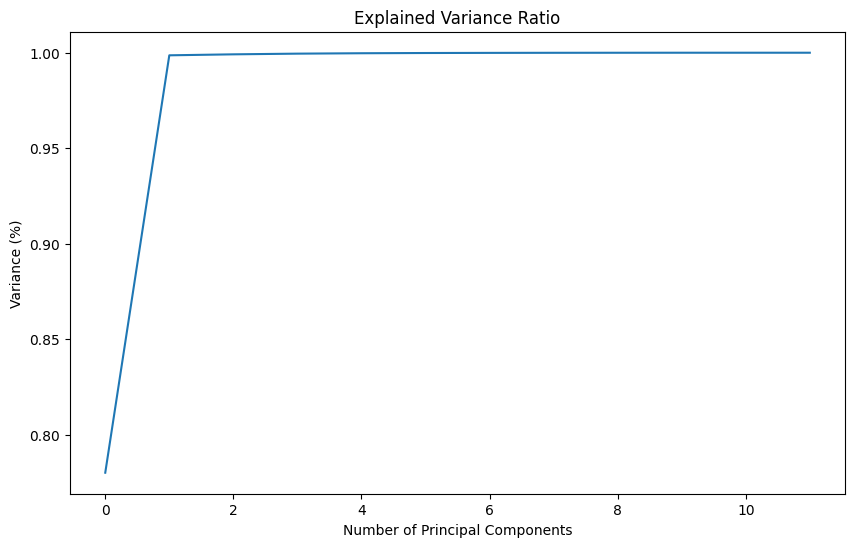

In [97]:
# Visualize all the features
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance Ratio')
plt.show()


In [98]:
# print variance for each component
explained_variance = pca.explained_variance_ratio_
explained_variance


array([7.80066217e-01, 2.18576159e-01, 5.12554245e-04, 3.60053729e-04,
       2.11340097e-04, 1.21751518e-04, 6.74415740e-05, 4.40165248e-05,
       2.21476661e-05, 1.48830954e-05, 1.24807463e-06, 9.95892390e-07])

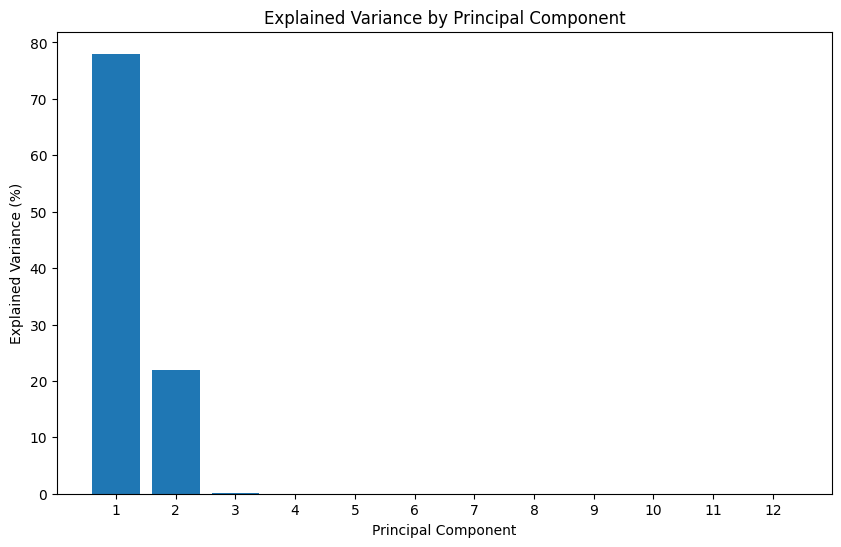

In [99]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [100]:
# Visualize principal components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_train)
# Transform the data to the new feature space
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [101]:
# print variance for each component
explained_variance = pca.explained_variance_ratio_
explained_variance



array([7.80066217e-01, 2.18576159e-01, 5.12554245e-04])

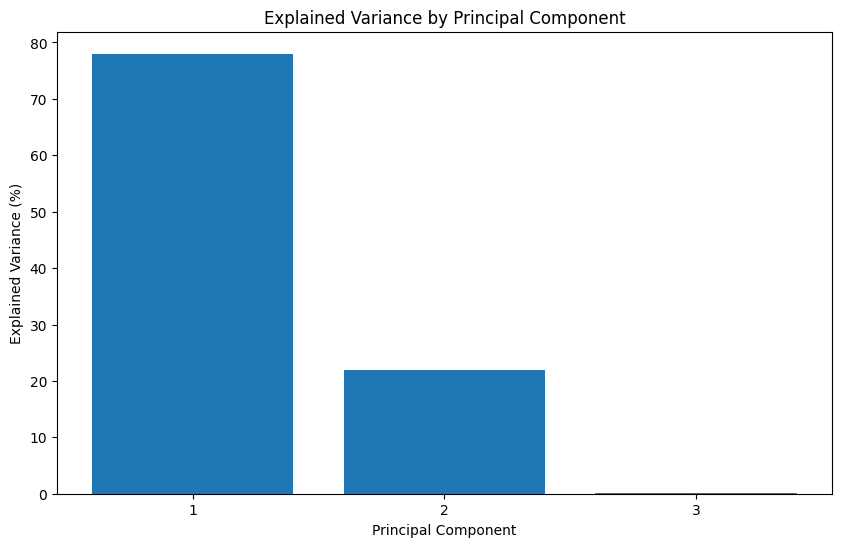

In [102]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [103]:
# Save pca model
import pickle

# save the model to disk
filename = 'linguistic_pca_model.sav'
pickle.dump(pca, open(filename, 'wb'))

# load the model from disk
loaded_pca = pickle.load(open(filename,'rb'))


In [104]:
print(X_train.shape)  # Shape of the current X_train
print(loaded_pca.components_.shape)  # Shape of PCA components

(10382, 51)
(3, 51)


In [105]:
loaded_pca.transform(X_train)

array([[-460.12642826,  -67.6165511 ,    6.85918628],
       [-303.7920851 ,  -62.96881641,    6.44957257],
       [ 949.57668983,  -96.36670581,   19.17969266],
       ...,
       [-579.35406257,  -80.67489156,    2.21214069],
       [1972.14812265,   22.47869181,  -25.3514201 ],
       [-285.94214689,    7.2076368 ,    2.74211908]])

In [106]:
# GET PCA DATA

# Create a DataFrame with the principal components

X_train_pca = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2', 'PC3'])
X_test_pca = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2', 'PC3'])


In [107]:
# Ensure indices align
X_train_pca = X_train_pca.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test_pca = X_test_pca.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Now concatenate the dataframes
X_train_pca = pd.concat([X_train_pca, y_train], axis=1)
X_test_pca = pd.concat([X_test_pca, y_test], axis=1)



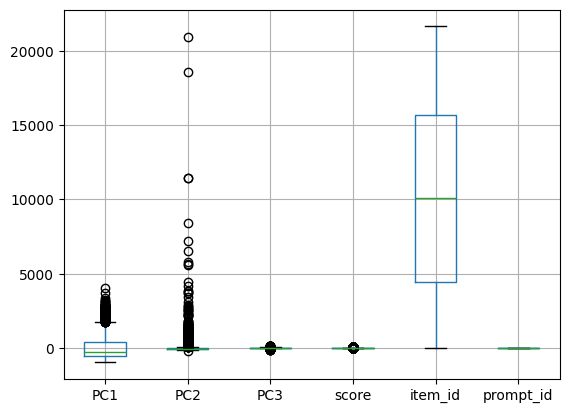

In [108]:
# Draw box plot

X_train_pca.boxplot()
plt.show()

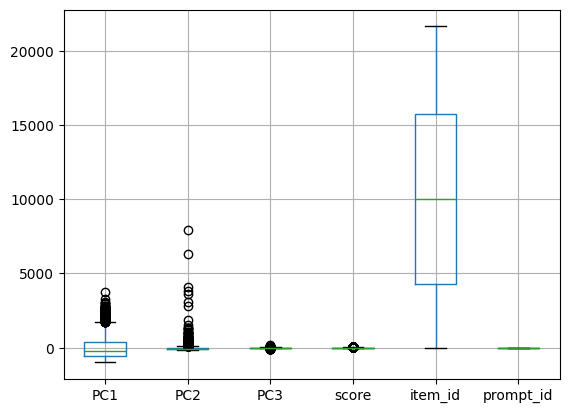

In [109]:
# Draw box plot

X_test_pca.boxplot()
plt.show()

In [110]:
X_test_pca.head()

,PC1,PC2,PC3,score,item_id,prompt_id
0,-782.975855,10.170193,3.033878,1.0,7398,3
1,-869.868822,-77.068758,7.183297,1.0,9876,4
2,-596.294261,-81.959821,-0.271597,2.0,7004,3
3,-530.887255,63.564376,-11.277363,2.0,6790,3
4,-200.299485,-63.364662,7.142807,3.0,4599,2


In [111]:
X_train_pca.head()

,PC1,PC2,PC3,score,item_id,prompt_id
0,-460.126428,-67.616551,6.859186,2.0,12280,5
1,-303.792085,-62.968816,6.449573,3.0,4216,2
2,949.576690,-96.366706,19.179693,4.0,3567,2
3,-753.914617,-68.953910,14.523100,1.0,10476,4
4,-667.615072,98.118313,1.994871,2.0,12599,5


In [112]:
# attach both now and set index to item_id

X_train_pca = X_train_pca.set_index('item_id')
X_test_pca = X_test_pca.set_index('item_id')


In [113]:
X_train_pca.head()


,PC1,PC2,PC3,score,prompt_id
item_id,,,,,
12280,-460.126428,-67.616551,6.859186,2.0,5
4216,-303.792085,-62.968816,6.449573,3.0,2
3567,949.576690,-96.366706,19.179693,4.0,2
10476,-753.914617,-68.953910,14.523100,1.0,4
12599,-667.615072,98.118313,1.994871,2.0,5


In [114]:
# Merge the train and test data (you can choose to concatenate them along rows)
merged_data = pd.concat([X_train_pca, X_test_pca])

# Sort by 'item_id'
merged_data = merged_data.sort_index()

merged_data.head()

,PC1,PC2,PC3,score,prompt_id
item_id,,,,,
1,541.696371,46.183729,-12.842499,8.0,1
2,890.969028,5.268062,-5.184799,9.0,1
3,280.842727,68.340789,-15.308198,7.0,1
4,1624.428424,-26.420795,-68.727565,10.0,1
5,1117.097576,-101.324789,-4.877604,8.0,1


In [115]:
# save

merged_data.to_csv('pca_1.csv', index=True)


In [116]:
readability = pd.read_csv('readability_data.csv')
readability.head()

,Essay_ID,Kincaid_Grade_Level,ARI,Coleman_Liau_Index,Flesch_Reading_Ease,Gunning_Fog_Index,LIX,SMOG_Index,RIX,Dale_Chall_Index,...,Total_Conjunctions,Total_Pronouns,Total_Prepositions,Total_Nominalizations,Total_Pronoun_Starters,Total_Interrogative_Starters,Total_Article_Starters,Total_Subordinate_Starters,Total_Conjunction_Starters,Total_Preposition_Starters
0,1.0,0.473611,0.512424,0.417457,0.567478,0.396054,0.514018,0.549841,0.407643,0.245001,...,0.318182,0.391304,0.470085,0.073171,0.08,0.285714,0.000000,0.333333,0.0,0.000000
1,2.0,0.582582,0.552950,0.441778,0.435069,0.554975,0.598785,0.698836,0.497725,0.368179,...,0.409091,0.452174,0.487179,0.219512,0.16,0.142857,0.181818,0.111111,0.0,0.000000
2,3.0,0.445281,0.470945,0.424657,0.567183,0.456524,0.497662,0.636807,0.393312,0.380837,...,0.363636,0.200000,0.299145,0.024390,0.04,0.142857,0.090909,0.111111,0.1,0.083333
3,4.0,0.562133,0.665803,0.703988,0.427117,0.566170,0.717465,0.723364,0.620564,0.552666,...,0.386364,0.313043,0.487179,0.390244,0.04,0.285714,0.363636,0.222222,0.0,0.250000
4,5.0,0.443214,0.410476,0.421405,0.516206,0.421611,0.437963,0.625058,0.333121,0.201825,...,0.340909,0.313043,0.487179,0.268293,0.28,0.000000,0.636364,0.444444,0.0,0.333333


In [117]:
readability.columns

Index(['Essay_ID', 'Kincaid_Grade_Level', 'ARI', 'Coleman_Liau_Index',
       'Flesch_Reading_Ease', 'Gunning_Fog_Index', 'LIX', 'SMOG_Index', 'RIX',
       'Dale_Chall_Index', 'Avg_Characters_per_Word', 'Avg_Syllables_per_Word',
       'Avg_Words_per_Sentence', 'Sentences_per_Paragraph', 'Type_Token_Ratio',
       'Total_Characters', 'Total_Syllables', 'Total_Words',
       'Unique_Word_Types', 'Total_Sentences', 'Total_Paragraphs',
       'Total_Long_Words', 'Total_Complex_Words', 'Total_Complex_Words_DC',
       'Total_ToBe_Verbs', 'Total_Auxiliary_Verbs', 'Total_Conjunctions',
       'Total_Pronouns', 'Total_Prepositions', 'Total_Nominalizations',
       'Total_Pronoun_Starters', 'Total_Interrogative_Starters',
       'Total_Article_Starters', 'Total_Subordinate_Starters',
       'Total_Conjunction_Starters', 'Total_Preposition_Starters'],
      dtype='object')

In [118]:
X= readability.drop(['Essay_ID'], axis=1)
Y = readability[['Essay_ID']]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# shape
X_train.shape, X_test.shape


((10382, 35), (2596, 35))

In [120]:
y_train.shape, y_test.shape

((10382, 1), (2596, 1))

In [121]:
# Apply PCA
pca = PCA(n_components=35)

pca.fit(X_train)

# Transform the data to the new feature space
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# print variance for each component
explained_variance = pca.explained_variance_ratio_

In [122]:
explained_variance

array([3.79279126e-01, 2.12013327e-01, 7.69166426e-02, 3.92430665e-02,
       3.26341507e-02, 2.87315566e-02, 2.67945675e-02, 2.40476514e-02,
       2.31254758e-02, 1.95104166e-02, 1.74040468e-02, 1.51811666e-02,
       1.32245197e-02, 1.18137882e-02, 1.16901663e-02, 1.06821899e-02,
       1.03561965e-02, 9.75885679e-03, 7.45121631e-03, 7.26294291e-03,
       5.15499525e-03, 4.35401853e-03, 3.55340282e-03, 2.83194268e-03,
       1.71499379e-03, 1.56688303e-03, 1.07977920e-03, 8.87497485e-04,
       6.01043604e-04, 4.03202902e-04, 3.44297812e-04, 1.57652758e-04,
       1.17401578e-04, 7.88858174e-05, 3.29320039e-05])

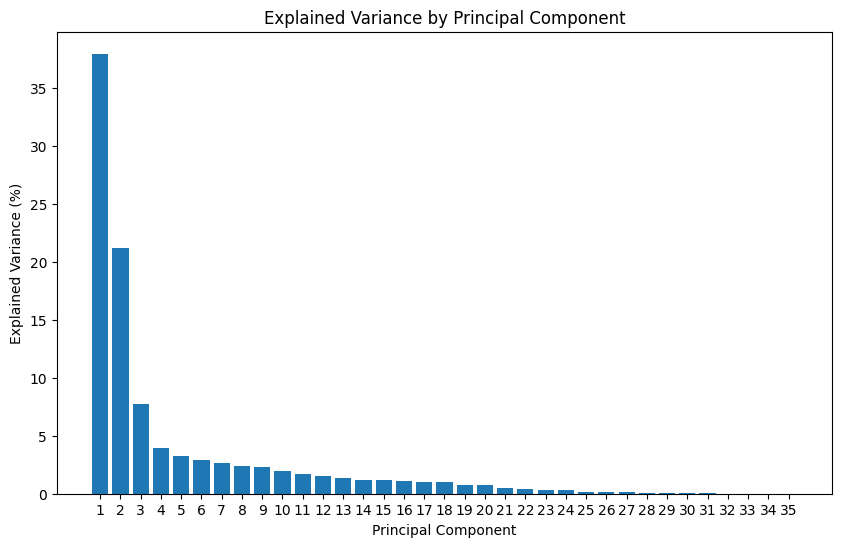

In [123]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


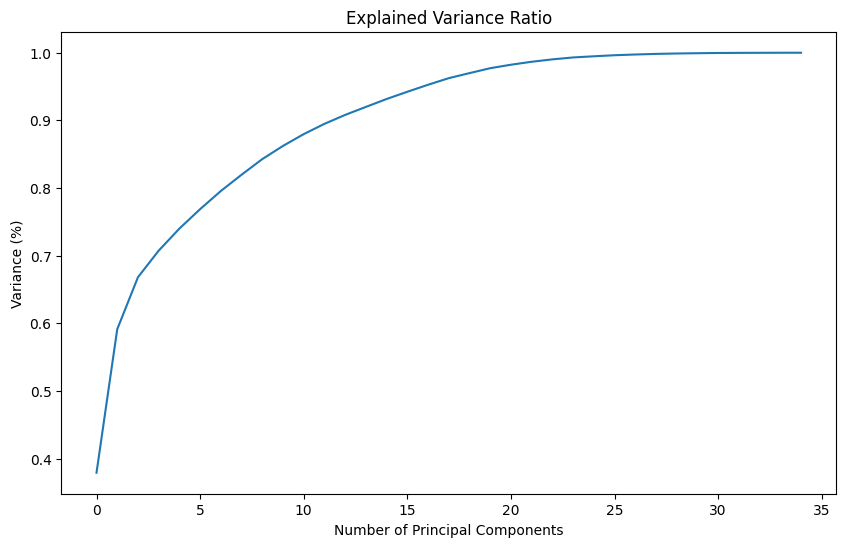

In [124]:
# Visualize all the features
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance Ratio')
plt.show()


In [125]:
# Apply PCA
pca = PCA(n_components=25)

pca.fit(X_train)

# Transform the data to the new feature space
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# print variance for each component
explained_variance = pca.explained_variance_ratio_

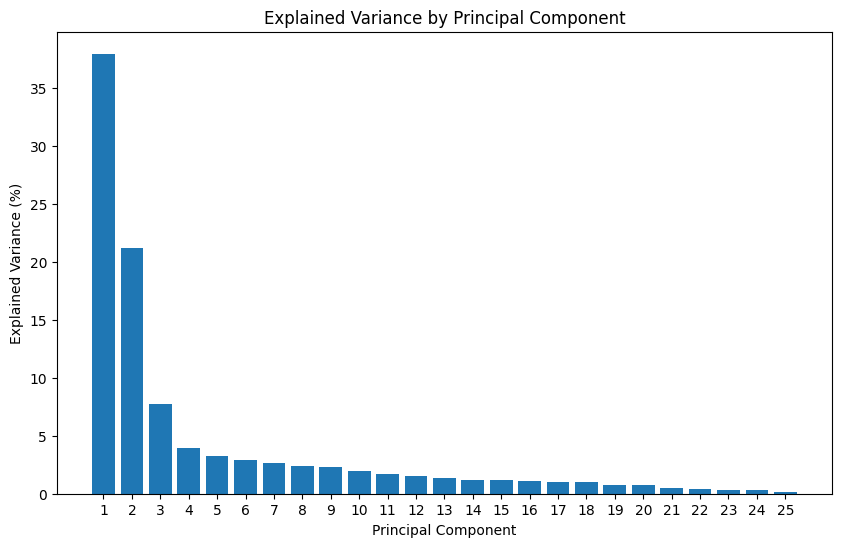

In [126]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


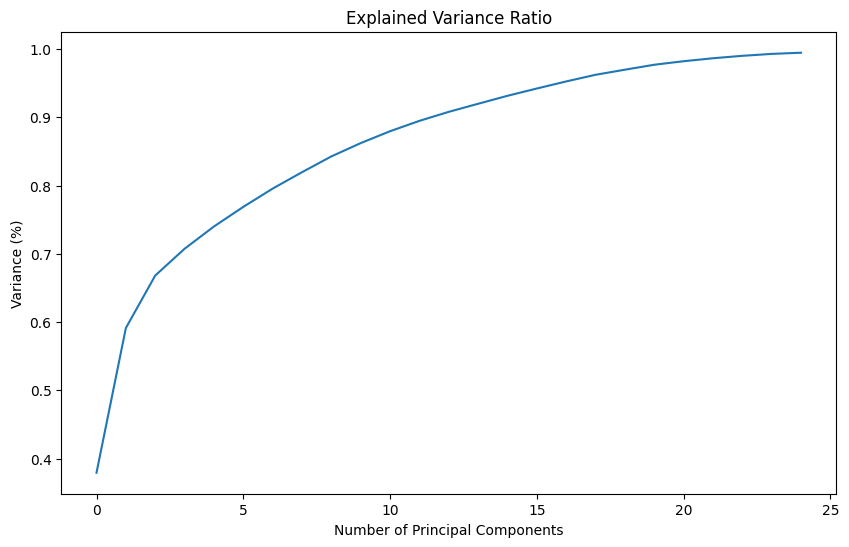

In [127]:
# Visualize all the features
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance Ratio')
plt.show()


In [128]:
# Save pca model
import pickle

# save the model to disk
filename = 'readability_pca_model.sav'
pickle.dump(pca, open(filename, 'wb'))

# load the model from disk
loaded_pca = pickle.load(open(filename,'rb'))


In [129]:
loaded_pca.transform(X_train)

array([[-0.27455802,  0.18504199, -0.02385497, ..., -0.05095492,
        -0.006421  ,  0.02495419],
       [-0.62803601, -0.01185995,  0.06468813, ..., -0.04438549,
         0.01094168, -0.04372475],
       [ 0.23440212, -0.06442674, -0.0272082 , ..., -0.10744506,
         0.05450859, -0.07921353],
       ...,
       [-0.27419125, -0.16836089, -0.1299501 , ...,  0.05705785,
        -0.0431432 ,  0.0016404 ],
       [ 1.29193794,  0.12519805,  0.2558008 , ..., -0.05559582,
         0.04526687,  0.00256473],
       [ 0.12913062, -0.03523631, -0.10583297, ...,  0.00179939,
        -0.06937587,  0.02462802]])

In [130]:
X_train_pca = pd.DataFrame(data=X_train_pca)
X_test_pca = pd.DataFrame(data=X_test_pca)


In [ ]:
# Draw box plot excluding Essay_ID

X_train_pca.boxplot()
plt.show()

# Draw box plot excluding Essay_ID

X_test_pca.boxplot()
plt.show()

In [131]:
X_train_pca

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.274558,0.185042,-0.023855,0.133286,-0.096628,0.272982,-0.027156,-0.179472,0.317040,-0.082863,...,0.005463,0.024988,-0.032880,0.018123,-0.008912,-0.005189,-0.024910,-0.050955,-0.006421,0.024954
1,-0.628036,-0.011860,0.064688,-0.319898,-0.137936,0.018539,-0.059466,-0.011107,-0.105722,0.064855,...,0.021906,0.067597,0.036029,-0.048646,-0.007701,-0.033522,-0.009292,-0.044385,0.010942,-0.043725
2,0.234402,-0.064427,-0.027208,-0.198546,0.093312,0.055581,-0.193890,-0.051413,0.115609,-0.123707,...,-0.041283,0.030274,-0.048643,-0.023953,-0.053153,-0.049006,-0.034551,-0.107445,0.054509,-0.079214
3,-0.463069,0.455754,-0.115382,0.032365,-0.003602,0.289164,-0.321912,-0.154120,0.054698,0.003751,...,-0.021391,-0.170462,0.355575,0.121827,-0.104472,-0.049293,-0.025561,0.043915,-0.012267,-0.074631
4,-0.567564,-0.342542,0.068372,0.145768,-0.015506,0.053643,0.033480,-0.052078,0.087154,-0.058060,...,-0.073240,0.034853,-0.008929,0.013151,-0.018410,-0.073549,0.058657,0.012508,-0.069975,0.014223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10377,-0.607400,0.424302,0.301926,0.188743,-0.174787,0.007290,0.150006,0.023620,0.160919,-0.014318,...,0.038649,-0.050371,0.117153,-0.035230,-0.058572,0.111358,0.006666,0.027977,0.001361,-0.001718
10378,0.677813,-0.364667,-0.234044,0.076986,-0.209022,0.034636,-0.003538,0.005885,-0.168491,0.077375,...,0.089653,0.055907,0.175146,-0.116253,0.077420,0.191146,0.091272,-0.014569,-0.054127,0.036824
10379,-0.274191,-0.168361,-0.129950,-0.124519,0.068035,-0.102183,-0.193081,0.072371,0.211277,-0.021528,...,-0.052496,0.099132,0.086363,-0.078520,-0.091254,0.054835,-0.052865,0.057058,-0.043143,0.001640
10380,1.291938,0.125198,0.255801,0.079351,-0.074093,-0.043518,0.020064,-0.117092,0.198257,-0.057201,...,-0.019997,0.130782,0.180703,-0.127558,0.098222,-0.008669,0.098957,-0.055596,0.045267,0.002565


In [132]:
# Ensure indices align
X_train_pca = X_train_pca.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test_pca = X_test_pca.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Now concatenate the dataframes
X_train_pca = pd.concat([X_train_pca, y_train], axis=1)
X_test_pca = pd.concat([X_test_pca, y_test], axis=1)



In [133]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Essay_ID
0,-0.274558,0.185042,-0.023855,0.133286,-0.096628,0.272982,-0.027156,-0.179472,0.317040,-0.082863,...,0.024988,-0.032880,0.018123,-0.008912,-0.005189,-0.024910,-0.050955,-0.006421,0.024954,12280.0
1,-0.628036,-0.011860,0.064688,-0.319898,-0.137936,0.018539,-0.059466,-0.011107,-0.105722,0.064855,...,0.067597,0.036029,-0.048646,-0.007701,-0.033522,-0.009292,-0.044385,0.010942,-0.043725,4216.0
2,0.234402,-0.064427,-0.027208,-0.198546,0.093312,0.055581,-0.193890,-0.051413,0.115609,-0.123707,...,0.030274,-0.048643,-0.023953,-0.053153,-0.049006,-0.034551,-0.107445,0.054509,-0.079214,3567.0
3,-0.463069,0.455754,-0.115382,0.032365,-0.003602,0.289164,-0.321912,-0.154120,0.054698,0.003751,...,-0.170462,0.355575,0.121827,-0.104472,-0.049293,-0.025561,0.043915,-0.012267,-0.074631,10476.0
4,-0.567564,-0.342542,0.068372,0.145768,-0.015506,0.053643,0.033480,-0.052078,0.087154,-0.058060,...,0.034853,-0.008929,0.013151,-0.018410,-0.073549,0.058657,0.012508,-0.069975,0.014223,12599.0


In [136]:
# attach both now and set index to Essay_ID

X_train_pca = X_train_pca.set_index('Essay_ID')
X_test_pca = X_test_pca.set_index('Essay_ID')


In [137]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Essay_ID,,,,,,,,,,,,,,,,,,,,,
12280.0,-0.274558,0.185042,-0.023855,0.133286,-0.096628,0.272982,-0.027156,-0.179472,0.317040,-0.082863,...,0.005463,0.024988,-0.032880,0.018123,-0.008912,-0.005189,-0.024910,-0.050955,-0.006421,0.024954
4216.0,-0.628036,-0.011860,0.064688,-0.319898,-0.137936,0.018539,-0.059466,-0.011107,-0.105722,0.064855,...,0.021906,0.067597,0.036029,-0.048646,-0.007701,-0.033522,-0.009292,-0.044385,0.010942,-0.043725
3567.0,0.234402,-0.064427,-0.027208,-0.198546,0.093312,0.055581,-0.193890,-0.051413,0.115609,-0.123707,...,-0.041283,0.030274,-0.048643,-0.023953,-0.053153,-0.049006,-0.034551,-0.107445,0.054509,-0.079214
10476.0,-0.463069,0.455754,-0.115382,0.032365,-0.003602,0.289164,-0.321912,-0.154120,0.054698,0.003751,...,-0.021391,-0.170462,0.355575,0.121827,-0.104472,-0.049293,-0.025561,0.043915,-0.012267,-0.074631
12599.0,-0.567564,-0.342542,0.068372,0.145768,-0.015506,0.053643,0.033480,-0.052078,0.087154,-0.058060,...,-0.073240,0.034853,-0.008929,0.013151,-0.018410,-0.073549,0.058657,0.012508,-0.069975,0.014223


In [138]:
# Merge the train and test data (you can choose to concatenate them along rows)
merged_data = pd.concat([X_train_pca, X_test_pca])

# Sort by 'item_id'
merged_data = merged_data.sort_index()

merged_data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Essay_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.219511,0.148259,0.465943,-0.059711,-0.133834,-0.162870,0.112683,0.131871,-0.076722,0.217938,...,-0.035069,-0.055069,0.035592,0.070616,0.094387,-0.022782,0.113741,0.057249,-0.047880,0.024452
2.0,0.579553,-0.192483,0.352745,-0.094607,0.086049,-0.197086,-0.044658,-0.047766,0.283989,0.122709,...,0.038420,0.049631,0.098052,-0.026176,0.017221,-0.059136,0.054820,0.067085,-0.008936,-0.020820
3.0,0.012355,0.071411,0.337702,0.041196,-0.094105,-0.162691,0.128779,-0.114620,0.030058,0.091802,...,-0.138844,-0.012181,0.010856,0.073653,0.036960,0.016380,0.074700,0.008405,0.011840,0.011166
4.0,1.046630,-0.517787,0.040844,0.077518,-0.193534,-0.278762,0.238641,-0.057268,0.368556,0.208320,...,0.061179,-0.044256,-0.001140,0.093825,0.039812,-0.082821,0.013209,-0.014502,0.110510,-0.029253
5.0,0.891548,0.157190,0.044759,-0.445084,0.052904,-0.011194,0.283403,-0.033490,0.502033,-0.131561,...,0.099959,-0.063315,-0.183649,-0.097319,-0.093041,-0.065607,0.017653,-0.024452,0.012495,0.007682


In [139]:
# save

merged_data.to_csv('pca_readability.csv', index=True)


In [141]:
# Save merged_data to pickle file
import numpy as np
import pickle

# Convert the DataFrame to a NumPy array
array_data = merged_data.values

array_data


array([[ 0.21951146,  0.14825909,  0.46594288, ...,  0.05724918,
        -0.04788012,  0.02445187],
       [ 0.57955321, -0.19248316,  0.35274501, ...,  0.0670846 ,
        -0.00893641, -0.0208205 ],
       [ 0.01235458,  0.0714114 ,  0.33770166, ...,  0.00840454,
         0.01184024,  0.01116571],
       ...,
       [ 1.41513119,  0.02717213,  0.36772336, ...,  0.03940825,
        -0.07858151,  0.00845444],
       [ 0.74378326,  0.42710992,  0.17828382, ..., -0.03967158,
        -0.03335005, -0.05309903],
       [ 0.42478522,  0.10414864,  0.30019363, ..., -0.02856689,
        -0.03000115,  0.01965499]])

In [142]:
# Save the array to a pickle file
with open('readability.pickle', 'wb') as f:
    pickle.dump(array_data, f)